In [10]:
import psycopg2
import pandas as pd
import sqlalchemy 
import seaborn as sns
from postgress import POSTGRES_ADDRESS
from postgress import POSTGRES_PORT 
from postgress import POSTGRES_USERNAME
from postgress import POSTGRES_PASSWORD
from postgress import POSTGRES_DBNAME
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float

In [11]:
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, 
                        ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
#print
# Create the connection
#engine = create_engine(postgres_str)
cnx = create_engine(postgres_str)
#conn = engine.connect()

<AxesSubplot:xlabel='salary', ylabel='Count'>

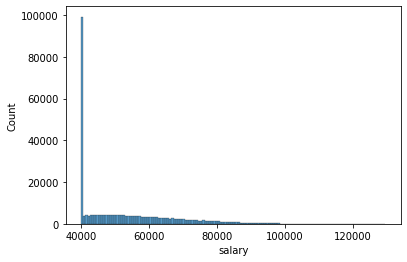

In [12]:
data = pd.read_sql("SELECT * FROM salaries", cnx)
sns.histplot(data = data, x = 'salary')

[Text(0, 0, 'Engineer'),
 Text(1, 0, 'Senior Engineer'),
 Text(2, 0, 'Technique Leader'),
 Text(3, 0, 'Staff'),
 Text(4, 0, 'Senior Staff'),
 Text(5, 0, 'Assistant Engineer'),
 Text(6, 0, 'Manager')]

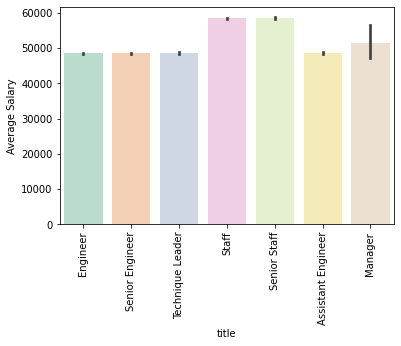

In [34]:
data = pd.read_sql('SELECT t.title, s.salary AS "Average Salary" FROM salaries AS s JOIN employees AS e \
                   ON s.emp_no = e.emp_no JOIN titles AS t ON e.emp_title_id = t.title_id', cnx)
g = sns.barplot(data = data, x = 'title', y = 'Average Salary', palette = 'Pastel2')
g.set_xticklabels(g.get_xticklabels(), rotation=90)